In [1]:
import numpy as np
import mglearn

w[0]: 0.393906  b: -0.031804


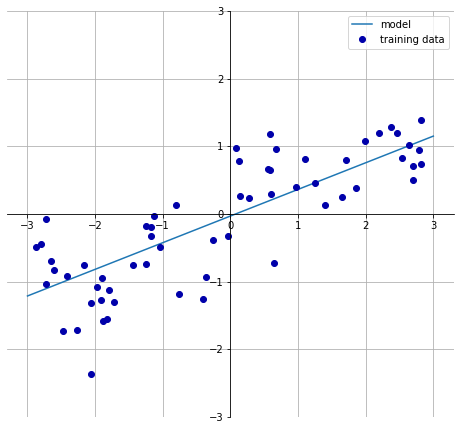

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [5]:
print("lr.coef_: ", lr.coef_)
print("lr.intercept: ", lr.intercept_)

lr.coef_:  [0.39390555]
lr.intercept:  -0.031804343026759746


In [6]:
print("train set score: ", lr.score(X_train, y_train))
print("test set score: ", lr.score(X_test, y_test))

train set score:  0.6700890315075756
test set score:  0.65933685968637


In [7]:
X, y = mglearn.datasets.load_extended_boston()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [9]:
print('train set score: ', lr.score(X_train, y_train))
print("train set score: ", lr.score(X_test, y_test))

train set score:  0.9520519609032727
train set score:  0.6074721959665943


In [32]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print('train set score: ', ridge.score(X_train, y_train))
print("train set score: ", ridge.score(X_test, y_test))

train set score:  0.8857966585170941
train set score:  0.7527683481744749


In [42]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('train set score: ', ridge01.score(X_train, y_train))
print("train set score: ", ridge01.score(X_test, y_test))

train set score:  0.9282273685001986
train set score:  0.7722067936479653


In [66]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('train set score: ', ridge10.score(X_train, y_train))
print("train set score: ", ridge10.score(X_test, y_test))

train set score:  0.7882787115369614
train set score:  0.6359411489177311


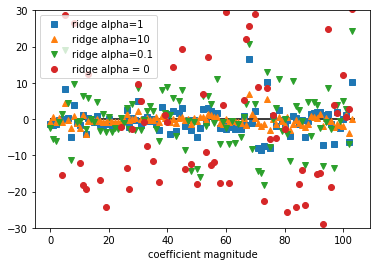

In [68]:
import matplotlib.pyplot as plt
plt.plot(ridge.coef_, 's', label='ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='ridge alpha=0.1')
plt.plot(Ridge(alpha=0).fit(X_train, y_train).coef_, 'o', label='ridge alpha = 0')
plt.xlabel('coefficient index')
plt.xlabel('coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_), color='black')
plt.ylim(-30, 30)
plt.legend()

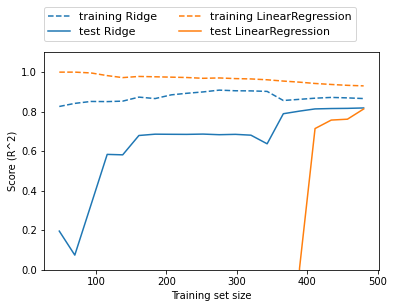

In [70]:
mglearn.plots.plot_ridge_n_samples()

In [74]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('train set score: ', lasso.score(X_train, y_train))
print('test set score: ', lasso.score(X_test, y_test))
print('number of features used: ', np.sum(lasso.coef_ != 0))

train set score:  0.29323768991114607
test set score:  0.20937503255272294
number of features used:  4


In [83]:
lasso001 = Lasso(alpha=0.01, max_iter=100_000).fit(X_train, y_train)
print('train set score: ', lasso001.score(X_train, y_train))
print('test set score: ', lasso001.score(X_test, y_test))
print('number of features used: ', np.sum(lasso001.coef_ != 0))

train set score:  0.8962226511086497
test set score:  0.7656571174549982
number of features used:  33


In [86]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100_000).fit(X_train, y_train)
print('train set score: ', lasso00001.score(X_train, y_train))
print('test set score: ', lasso00001.score(X_test, y_test))
print('number of features used: ', np.sum(lasso00001.coef_ != 0))

train set score:  0.9507158754515463
test set score:  0.6437467421272821
number of features used:  96


Text(0, 0.5, 'coefficient magnitude')

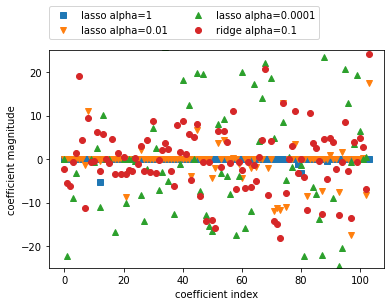

In [97]:
plt.plot(lasso.coef_, 's', label='lasso alpha=1')
plt.plot(lasso001.coef_, 'v', label='lasso alpha=0.01')
plt.plot(lasso00001.coef_, '^', label='lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

c:\users\aboud\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


c:\users\aboud\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


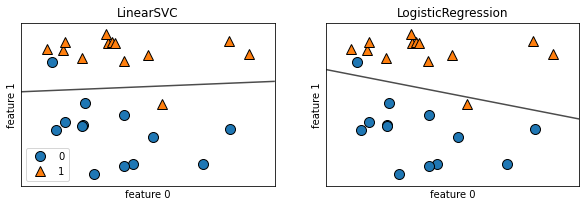

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for m, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = m.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend()

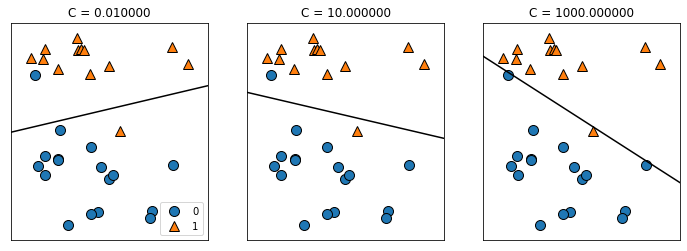

In [114]:
mglearn.plots.plot_linear_svc_regularization()

In [126]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print('train set score: ', logreg.score(X_train, y_train))
print('test set score: ', logreg.score(X_test, y_test))

train set score:  0.9577464788732394
test set score:  0.958041958041958


In [127]:
logreg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
print('train set score: ', logreg100.score(X_train, y_train))
print('test set score: ', logreg100.score(X_test, y_test))

train set score:  0.9812206572769953
test set score:  0.972027972027972


In [137]:
logreg001 = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
print('train set score: ', logreg001.score(X_train, y_train))
print('test set score: ', logreg001.score(X_test, y_test))

train set score:  0.9530516431924883
test set score:  0.951048951048951


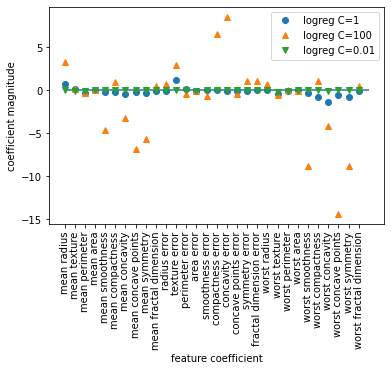

In [147]:
plt.plot(logreg.coef_.T, 'o',label='logreg C=1')
plt.plot(logreg100.coef_.T, '^',label='logreg C=100')
plt.plot(logreg001.coef_.T, 'v',label='logreg C=0.01')
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('feature coefficient')
plt.ylabel('coefficient magnitude')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.legend()

training accuracy of l1 logreg with C=0.001: 0.9577464788732394
test accuracy of l1 logreg with C=0.001: 0.958041958041958

training accuracy of l1 logreg with C=1: 0.9577464788732394
test accuracy of l1 logreg with C=1: 0.958041958041958

training accuracy of l1 logreg with C=100: 0.9577464788732394
test accuracy of l1 logreg with C=100: 0.958041958041958



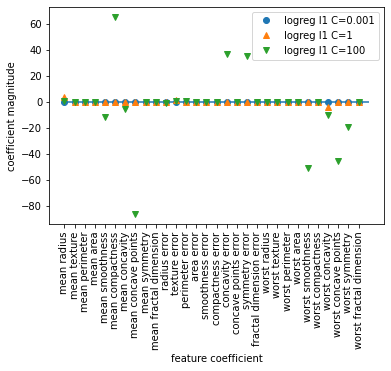

In [156]:
for c, m in zip([0.001, 1, 100], ['o', '^', 'v']):
    logreg_l1 = LogisticRegression(C=c, solver='liblinear', penalty='l1', max_iter=10000).fit(X_train, y_train)
    print(f'training accuracy of l1 logreg with C={c}: {logreg.score(X_train, y_train)}')
    print(f'test accuracy of l1 logreg with C={c}: {logreg.score(X_test, y_test)}\n')
    plt.plot(logreg_l1.coef_.T, m, label=f'logreg l1 C={c}')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('feature coefficient')
plt.ylabel('coefficient magnitude')
plt.legend()

In [157]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)

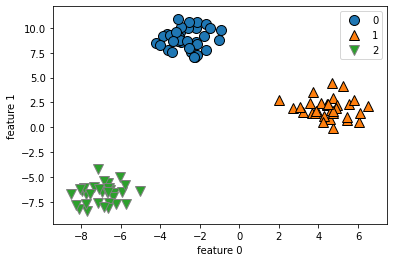

In [170]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend()

In [171]:
linear_svm = LinearSVC().fit(X, y)
print('coefficient shape: ', linear_svm.coef_.shape)
print('intercept shape: ', linear_svm.intercept_.shape)

coefficient shape:  (3, 2)
intercept shape:  (3,)


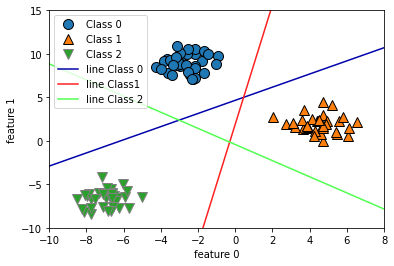

In [201]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, incpt, c in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + incpt) / coef[1], c=c)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2', 'line Class 0', 'line Class1', 'line Class 2'])